In [1]:
import os

In [2]:
data_dir = "/Users/elischwat/Downloads/landsat/"

In [7]:
folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
folders

['LC09_L2SP_035033_20230421_20230423_02_T1',
 'LC08_L2SP_035033_20230515_20230523_02_T1',
 'LC08_L2SP_034033_20230609_20230614_02_T1',
 'LC09_L2SP_034033_20230601_20230603_02_T1',
 'LC09_L2SP_034033_20230414_20230416_02_T1',
 'LC09_L2SP_034033_20230617_20230619_02_T1',
 'LC09_L2SP_034033_20230430_20230502_02_T1',
 'LC09_L2SP_035033_20230523_20230601_02_T1',
 'LC09_L2SP_035033_20230507_20230509_02_T1',
 'LC08_L2SP_035033_20230413_20230421_02_T1',
 'LC08_L2SP_035033_20230429_20230509_02_T1',
 'LC09_L2SP_035033_20230624_20230627_02_T1',
 'LC09_L2SP_034033_20230516_20230518_02_T1',
 'LC08_L2SP_034033_20230625_20230630_02_T1',
 'LC09_L2SP_035033_20230405_20230407_02_T1',
 'LC09_L2SP_035033_20230608_20230610_02_T1',
 'LC08_L2SP_034033_20230508_20230517_02_T1',
 'LC08_L2SP_034033_20230524_20230602_02_T1',
 'LC08_L2SP_035033_20230531_20230607_02_T1',
 'LC08_L2SP_035033_20230616_20230623_02_T1',
 'LC08_L2SP_034033_20230406_20230412_02_T1']

In [25]:
for folder in folders:
    files = os.listdir(os.path.join(data_dir, folder))
    file_b1 = [f for f in files if f.endswith('B1.TIF')]
    assert len(file_b1) == 1
    file_b1 = file_b1[0]
    file_b2 = [f for f in files if f.endswith('B2.TIF')]
    assert len(file_b2) == 1
    file_b2 = file_b2[0]
    file_b3 = [f for f in files if f.endswith('B3.TIF')]
    assert len(file_b3) == 1
    file_b3 = file_b3[0]
    print(file_b1, file_b2, file_b3)
    output_rgb_file = file_b3.replace('B3.TIF', 'RGB.TIF')
    command = f"""gdalbuildvrt -separate \
            {os.path.join(data_dir, output_rgb_file)} \
            {os.path.join(data_dir, folder, file_b1)} \
            {os.path.join(data_dir, folder, file_b2)} \
            {os.path.join(data_dir, folder, file_b3)}
        """
    os.system(command)

LC09_L2SP_035033_20230421_20230423_02_T1_SR_B1.TIF LC09_L2SP_035033_20230421_20230423_02_T1_SR_B2.TIF LC09_L2SP_035033_20230421_20230423_02_T1_SR_B3.TIF
0...10...20...30...40...50...60...70...80...90...100 - done.
LC08_L2SP_035033_20230515_20230523_02_T1_SR_B1.TIF LC08_L2SP_035033_20230515_20230523_02_T1_SR_B2.TIF LC08_L2SP_035033_20230515_20230523_02_T1_SR_B3.TIF
0...10...20...30...40...50...60...70...80...90...100 - done.
LC08_L2SP_034033_20230609_20230614_02_T1_SR_B1.TIF LC08_L2SP_034033_20230609_20230614_02_T1_SR_B2.TIF LC08_L2SP_034033_20230609_20230614_02_T1_SR_B3.TIF
0...10...20...30...40...50...60...70...80...90...100 - done.
LC09_L2SP_034033_20230601_20230603_02_T1_SR_B1.TIF LC09_L2SP_034033_20230601_20230603_02_T1_SR_B2.TIF LC09_L2SP_034033_20230601_20230603_02_T1_SR_B3.TIF
0...10...20...30...40...50...60...70...80...90...100 - done.
LC09_L2SP_034033_20230414_20230416_02_T1_SR_B1.TIF LC09_L2SP_034033_20230414_20230416_02_T1_SR_B2.TIF LC09_L2SP_034033_20230414_20230416_02_T1_S

In [26]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import re

# Function to convert DMS (degrees, minutes, seconds) to decimal degrees
def dms_to_decimal(dms):
    match = re.match(r"(\d+)° (\d+\.\d+)'([NSEW])", dms)
    if not match:
        raise ValueError(f"Invalid DMS format: {dms}")
    degrees, minutes, direction = match.groups()
    decimal = float(degrees) + float(minutes) / 60
    if direction in ['S', 'W']:
        decimal = -decimal
    return decimal

# Table data
data = [
    {"Tower": "uw", "lat": "38° 56.522'N", "lon": "106° 58.378'W", "alt": 2863},
    {"Tower": "ue", "lat": "38° 56.507'N", "lon": "106° 58.395'W", "alt": 2861},
    {"Tower": "d", "lat": "38° 56.504'N", "lon": "106° 58.369'W", "alt": 2861},
    {"Tower": "c", "lat": "38° 56.509'N", "lon": "106° 58.379'W", "alt": 2861}
]

# Convert lat/lon to decimal degrees and create a GeoDataFrame
for row in data:
    row["lat"] = dms_to_decimal(row["lat"])
    row["lon"] = dms_to_decimal(row["lon"])

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Create a GeoPandas GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df["lon"], df["lat"])],
    crs="EPSG:4326"  # WGS84 coordinate reference system
)

print(gdf)

  Tower        lat         lon   alt                     geometry
0    uw  38.942033 -106.972967  2863  POINT (-106.97297 38.94203)
1    ue  38.941783 -106.973250  2861  POINT (-106.97325 38.94178)
2     d  38.941733 -106.972817  2861  POINT (-106.97282 38.94173)
3     c  38.941817 -106.972983  2861  POINT (-106.97298 38.94182)


<Axes: >

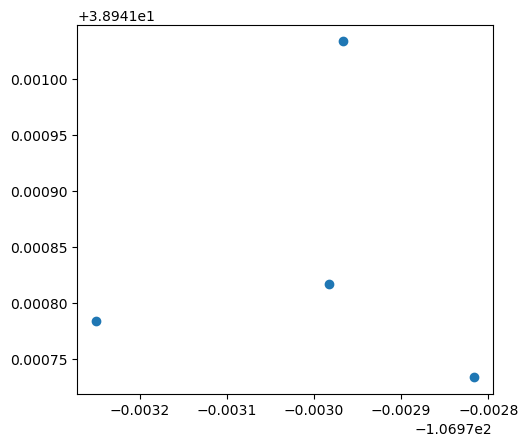

In [29]:
gdf.plot()

In [30]:
gdf.to_file('towers.geojson')